In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.gridspec as gridspec
from astropy.io import fits
from scipy.optimize import curve_fit

[10.17718029 10.64623451 13.61757469 ... 11.03914165  8.1594038
  8.4171896 ]
[1.08212852 1.09740162 2.09108543 ... 0.72494602 0.99697113 0.3502655 ]
[12.35757923 11.3815794   9.8738699  ...  2.03272517 23.13839137
  5.38308252]


/var/folders/gb/84crw45935qgcqbl80bslprc0000gn/T/ipykernel_11563/1424215500.py:7: RuntimeWarning: invalid value encountered in log10
  absG=hamstar['G']-5*(np.log10(distkpc*1000/10))


(-2.0, 4.0)

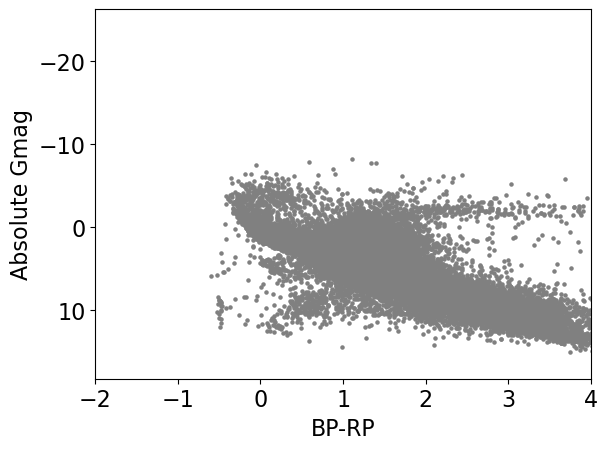

In [11]:
path='/Users/baotong/data_GalDisc/data/'
hamstar = fits.open(path + 'match_e_xmm/HamStar_eRASS1_Main_Likely_Identifications_v1.1.fits')[1].data
print(hamstar['G'])
print(hamstar['BP_RP'])
print(hamstar['PLX'])
distkpc=1/hamstar['PLX']
absG=hamstar['G']-5*(np.log10(distkpc*1000/10))
plt.scatter(hamstar['BP_RP'],absG,marker='.', 
            s=20, color='gray',
            label='No stars' )
plt.gca().invert_yaxis()
plt.xlabel('BP-RP', fontsize=16)
plt.ylabel('Absolute Gmag', fontsize=16)
plt.tick_params(labelsize=16)
plt.xlim(-2,4)

In [9]:
from dustmaps.bayestar import BayestarQuery
from astropy.coordinates import SkyCoord
import astropy.units as u
from dustmaps.config import config

In [7]:
config['data_dir'] = '/Users/baotong/dustmaps/'  # 设置数据存储路径
from dustmaps.bayestar import fetch
fetch()


  0.0 B of 694.2 MiB |   0.0 s/B |                      |   0% | ETA:  --:--:--
 34.0 KiB of 694.2 MiB | 333.7 KiB/s |                  |   0% | ETA:   0:35:30
 85.0 KiB of 694.2 MiB | 420.5 KiB/s |                  |   0% | ETA:   0:28:10
221.0 KiB of 694.2 MiB | 725.5 KiB/s |                  |   0% | ETA:   0:16:19
321.0 KiB of 694.2 MiB | 793.2 KiB/s |                  |   0% | ETA:   0:14:55
445.0 KiB of 694.2 MiB | 881.7 KiB/s |                  |   0% | ETA:   0:13:25
664.0 KiB of 694.2 MiB |   1.1 MiB/s |                  |   0% | ETA:   0:10:46
884.0 KiB of 694.2 MiB |   1.2 MiB/s |                  |   0% | ETA:   0:09:27
  1.1 MiB of 694.2 MiB |   1.4 MiB/s |                  |   0% | ETA:   0:08:08
  1.5 MiB of 694.2 MiB |   1.6 MiB/s |                  |   0% | ETA:   0:07:05
  2.3 MiB of 694.2 MiB |   2.3 MiB/s |                  |   0% | ETA:   0:05:03
  3.0 MiB of 694.2 MiB |   2.7 MiB/s |                  |   0% | ETA:   0:04:15
  4.5 MiB of 694.2 MiB |   3.7 MiB/s |  

In [14]:
from dustmaps.bayestar import BayestarQuery
from astropy.coordinates import SkyCoord
import astropy.units as u
bayestar = BayestarQuery(version='bayestar2019')  
coords = SkyCoord(ra=266.41683, dec=-29.00781, unit=(u.deg, u.deg), frame='icrs')
ebv_samples = bayestar(coords, mode='samples')  
distances = bayestar.distances  # 获取距离节点 (单位: kpc)
for d, e in zip(distances, ebv_samples[0]):
    print(f"Distance: {d:.2f}, E(B-V): {e:.4f}")


Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 18.748 s
  pix_info:   0.267 s
   samples:  10.224 s
      best:   2.051 s
       nan:   0.023 s
      sort:   6.129 s
       idx:   0.054 s
Distance: 0.06 kpc pc, E(B-V): 0.0000
Distance: 0.07 kpc pc, E(B-V): 0.0000
Distance: 0.07 kpc pc, E(B-V): 0.0000
Distance: 0.07 kpc pc, E(B-V): 0.0000
Distance: 0.08 kpc pc, E(B-V): 0.0000
Distance: 0.08 kpc pc, E(B-V): 0.0000
Distance: 0.09 kpc pc, E(B-V): 0.0000
Distance: 0.09 kpc pc, E(B-V): 0.0000
Distance: 0.10 kpc pc, E(B-V): 0.0000
Distance: 0.11 kpc pc, E(B-V): 0.0000
Distance: 0.11 kpc pc, E(B-V): 0.0000
Distance: 0.12 kpc pc, E(B-V): 0.0000
Distance: 0.13 kpc pc, E(B-V): 0.0000
Distance: 0.13 kpc pc, E(B-V): 0.0000
Distance: 0.14 kpc pc, E(B-V): 0.0000
Distance: 0.15 kpc pc,

A_G=2.74*E(B-V)

A_{BP}=3.14*E(B-V)

A_{RP}=2.05*E(B-V)

m_corrected=m_observed-Av

In [20]:
target_distance = 2.2
distances_pc = np.array(bayestar.distances)
ebv_target = np.interp(target_distance, distances_pc, ebv_samples[0])
print(f"Target Distance: {target_distance} kpc, E(B-V): {ebv_target:.4f}")

Target Distance: 2.2 kpc, E(B-V): 0.7800


[  2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18  21  24
  28  29  32  33  34  35  39  40  41  42  43  44  46  48  49  50  52  53
  54  55  56  57  58  59  60  61  62  63  64  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  91  92
  96  97  98  99 100 101 105 107 108 109 112 115 117 118 119 120 121 122
 123 124 126 127 129 130 131 132 133 135 136 137 138 139 140 141]


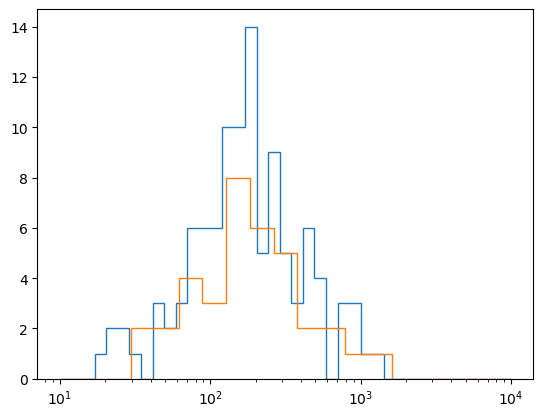

In [28]:
path= '/Users/baotong/data_GalDisc/data/match_e_xmm/'
tablename='e_xmmdr14s_merge_spec_starinfo.xlsx'
df=pd.read_excel(path+tablename,sheet_name='label')
filtered_df = df[(df['sep_exmm'] < 17)]
filtered_df=filtered_df.dropna(subset=['gaia_gmag', 'gaia_bpmag','gaia_rpmag'])
Lsun = 3.846e33 * u.erg / u.s
msun=-26.7 
absmsun = 4.66
Fopt=10**(0.4*(msun-np.array(filtered_df['gaia_gmag'].values)))*Lsun/(4*np.pi*(1*u.au)**2)
Fopt=Fopt.to(u.erg/u.cm**2/u.s).value
Fx = filtered_df['xmmflux'].values
Fx_err=filtered_df['xmmfluxerr'].values
BP_RP = filtered_df['gaia_bpmag'].values-filtered_df['gaia_rpmag'].values
CTP_SEP = np.array(filtered_df['CTP_SEP'])
ToType = np.array(filtered_df['ToType'])
abs_Gmag = filtered_df['gaia_gmag'].values-5 * (np.log10(filtered_df['distkpc'].values*1000/10))
indexstar = np.where(CTP_SEP > 0)[0]
indexnotstar = np.where(CTP_SEP < 0)[0]
index_hards = np.where(ToType == 'hardS')[0]
index_CV = np.where(ToType == 'CV')[0]
index_LMXB = np.where(ToType == 'LMXB')[0]
index_AGN = np.where(ToType == 'AGN')[0]
print(indexstar)
hamstar = fits.open(path + 'HamStar_eRASS1_Main_Likely_Identifications_v1.1.fits')[1].data
distkpcall=1/hamstar['PLX']
plt.hist(distkpcall[indexstar]*1000,bins=np.logspace(1,4,40),histtype='step')
plt.hist(distkpcall[indexnotstar]*1000,bins=np.logspace(1,4,20),histtype='step')
plt.semilogx()
plt.show()